<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-1">Helper Functions</a></span></li><li><span><a href="#Load-and-view-data" data-toc-modified-id="Load-and-view-data-2">Load and view data</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3">Model</a></span></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-4">Visualize</a></span></li></ul></div>

In [1]:
import pandas as pd

### Helper Functions

In [2]:
def display_overview(df):
    """Convenience function for printing useful information from pandas
    data table `df`
    """
    print("Head"); display(df.head())
    print("Stats"); display(df.describe(include="all"))
    print("Additional info:")
    df.info()

### Load and view data

In [ ]:
print()

In [3]:
df_music = pd.read_csv("music.csv")
display_overview(df_music)

Head


,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


Stats


,age,gender,genre
count,18.000000,18.000000,18
unique,NaN,NaN,5
top,NaN,NaN,Classical
freq,NaN,NaN,6
mean,27.944444,0.500000,NaN
std,5.127460,0.514496,NaN
min,20.000000,0.000000,NaN
25%,25.000000,0.000000,NaN
50%,28.000000,0.500000,NaN
75%,31.000000,1.000000,NaN


Additional info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


It looks like the data is organized by row, where each row is for a single person, with the fields: `age`, `gender`, and `genre` of music.

Assuming that `gender` is a category, let's convert this column from type `Int64` to `Categorical` so that it properly displays under `describe` and `info`.

Note: I haven't watched the video, but I am assuming that `genre` is the music that a particual person likes, and `gender` is a categorical variable. My b if this is off!

In [4]:
df_music["gender"] = pd.Categorical(df_music["gender"])
display_overview(df_music)

Head


,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


Stats


,age,gender,genre
count,18.000000,18.0,18
unique,NaN,2.0,5
top,NaN,1.0,Classical
freq,NaN,9.0,6
mean,27.944444,NaN,NaN
std,5.127460,NaN,NaN
min,20.000000,NaN,NaN
25%,25.000000,NaN,NaN
50%,28.000000,NaN,NaN
75%,31.000000,NaN,NaN


Additional info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     18 non-null     int64   
 1   gender  18 non-null     category
 2   genre   18 non-null     object  
dtypes: category(1), int64(1), object(1)
memory usage: 530.0+ bytes


### Model

With the data cleaned, let's now run a classifier on it with `sklearn`

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

In [6]:
# Feature matrix
features = ["age", "gender"]
X = df_music[features]

# Class labels
label = "genre"
y = df_music[label]
classes = sorted(y.unique())

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize model and run fit
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Score
score = accuracy_score(y_test, predictions)
print(f"Score: {score}")

Score: 1.0


### Visualize

With the model defined, we can take a look at the tree with `graphviz`, which can be installed with:
```
conda install python-graphviz 
```

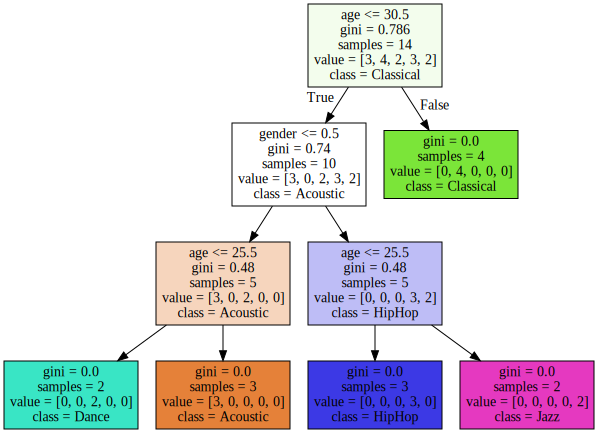

In [8]:
dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=features,
    class_names=classes,
    filled=True,
    label="all",
)

graph = graphviz.Source(dot_data, format="png")
graph